In [ ]:
!pip install pandas_ods_reader

In [115]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas_ods_reader import read_ods
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [2]:
path = "data2.ods"
data = read_ods(path)

In [3]:
data.count()

Horodateur                                                                                                     1191
unnamed.1                                                                                                      1191
unnamed.2                                                                                                      1191
Boutique                                                                                                       1191
code postal                                                                                                    1191
Depuis combien de temps êtes vous un client de la Maison Pariès ?                                              1191
A quelle fréquence venez-vous nous rendre visite ?                                                             1191
Comment nous avez-vous connus ?                                                                                1191
En 2 mots, comment définiriez-vous la Maison ?                          

In [ ]:
data["Tranche d'âge"].value_counts()

# Pourcentage des 65+

In [ ]:
(data["Tranche d'âge"].value_counts()[2] / data["Tranche d'âge"].count()) * 100

# Pourcentage des 50/64

In [ ]:
(data["Tranche d'âge"].value_counts()[0] / data["Tranche d'âge"].count()) * 100

# Pourcentage des 35/49

In [ ]:
(data["Tranche d'âge"].value_counts()[1] / data["Tranche d'âge"].count()) * 100

# Pourcentage des 25/34

In [ ]:
(data["Tranche d'âge"].value_counts()[3] / data["Tranche d'âge"].count()) * 100

# Pourcentage des 18/24

In [ ]:
(data["Tranche d'âge"].value_counts()[4] / data["Tranche d'âge"].count()) * 100

# Pourcentage des 15/17

In [ ]:
(data["Tranche d'âge"].value_counts()[5] / data["Tranche d'âge"].count()) * 100

In [ ]:
data[data['A quelle fréquence venez-vous nous rendre visite ?'] == "visite exceptionnelle"].shape[0]

In [ ]:
concat_df = pd.concat([data[data["Tranche d'âge"] == "35/49"], data[data['A quelle fréquence venez-vous nous rendre visite ?'] == "visite exceptionnelle"]], axis=1)

In [ ]:
concat_df.shape[0]

In [ ]:
data.shape[0] 

In [ ]:
concat_df.shape[0] / data.shape[0] * 100

# On drop les colonnes qui ne nous intéressent pas

In [82]:
data.drop(columns=["Pourquoi ?.1", "Horodateur", "unnamed.1", "unnamed.2", "Quel est le dernier produit de la gamme Pariès que vous connaissez ?", "de combien de personnes se compose votre foyer ?", "S'il y a des enfants dans votre foyer, quel âge ont-ils ?", "Si non, confiez-moi votre adresse mail pour recevoir notre actualité (moins de 10 mails par an)"], inplace=True)

In [ ]:
data.drop(columns=["Pourquoi ?"], inplace=True)

In [83]:
data.head()

,Boutique,code postal,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Comment nous avez-vous connus ?,"En 2 mots, comment définiriez-vous la Maison ?",A quelle(s) occasion(s) effectuez-vous des achats chez nous,Quel est le produit que vous préférez ?,8. Quels sont les produits de nos gammes que vous achetez chez d’autres artisans ?,Où achetez-vous nos produits ?,Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?,"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?",Que devons-nous faire pour progresser ?,Sexe,Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,Êtes-vous abonné à notre newsletter ?,Chocolat,Gateau Basque,Code postal
0,St Jean,31410.0,2,0,bouche à oreille,Accueillant,pour me faire plaisir; pour régaler ma famille,Gateau basque,Gateau basque,Toujours dans la même boutique,0,0.0,Je ne sais pas,1,1,5,0,0,1,0
1,St Jean,64500.0,3,0,"avec vos parents, votre famille",Bon; Fiable,pour me faire plaisir; pour régaler ma famille...,Pâtisseries,Aucun,Toujours dans la même boutique,0,NaN,Je ne sais pas,1,1,5,0,0,0,1
2,St Jean,62400.0,2,1,par hasard en passant devant,Plaisant,pour me faire plaisir,Gateau basque chocolat,Viennoiseries,Toujours dans la même boutique,0,NaN,Gateau basque plus épais,1,0,3,0,0,1,0
3,St Jean,33820.0,2,0,par hasard en passant devant,Alléchant,pour me faire plaisir; pour faire un cadeau,Viennoiseries Royal Amande,Gateau basque,Toujours dans la même boutique,0,1.0,Gateau basque plus épais,0,1,5,0,0,0,0
4,St Jean,64210.0,2,0,par hasard en passant devant; bouche à oreille,Savoureux; Raffiné,pour me faire plaisir; pour faire un cadeau,Mouchous amande,Gateau basque; Chocolat,En fonction de l'endroit où je me trouve,0,NaN,Baisser les prix; Diversifier les parfums de g...,1,0,3,0,0,0,1


In [58]:
data['Gateau Basque'] =(data['Quel est le produit que vous préférez ?'].str.find('Gateau basque')>=0).astype(int)
# 0 = Pas gateau basque
# 1 = gateau basque

In [55]:
data['Code postal'] =(data['code postal'].astype(str).str.find('64',0,2)==0).astype(int)
# 0 = Autre département
# 1 = Locaux

In [28]:
data['Chocolat'] =(data['Quel est le produit que vous préférez ?'].str.find('Chocolat')>=0).astype(int)
# 0 = Pas chocolat
# 1 = Chocolat

In [9]:
dict = {"Oui" : 1, "Non" : 0}
data=data.replace({"Êtes-vous abonné à notre newsletter ?": dict})
# 1 = Abonné au Newsletter
# 0 = Pas abonné au Newsletter

In [10]:
dict = {"Depuis quelques années" : 2, "Depuis toujours" : 3, "Depuis moins d'un an": 1, "C’est une de mes premières visites" : 0}
data=data.replace({"Depuis combien de temps êtes vous un client de la Maison Pariès ?": dict})
# 0 = C’est une de mes premières visites
# 1 = Depuis moins d'un an
# 2 = Depuis quelques années
# 3 = Depuis toujours

In [11]:
dict = {"visite exceptionnelle" : 0, "visite mensuelle" : 1 , "C'est la première fois !": 0, "visite hebdomadaire" : 1, "Tous les 15 jours" : 1, "3 fois par semaine" : 1 , "Tous les jours" : 1 , "visite exceptionnelle; Surtout en été" : 0,"Surtout en été" : 0 ,"Surtout l'été; Noël" : 0 ,"Surtout l’été" : 0 ,"Tous les 2 jours" : 1 ,"visite exceptionnelle, Surtout en été" : 0}
data=data.replace({"A quelle fréquence venez-vous nous rendre visite ?": dict})
# 1 = Client fidèle (Au moins une fois par mois)
# 0 = Client pas fidèle

In [12]:
dict = {"65 et +" : 5, "25/34" : 3 , "50/64": 5, "18/24" : 1, "35/49" : 4, "15/17" : 0}
data=data.replace({"Tranche d'âge": dict})
# 0 = 15/17
# 1 = 18/24
# 2 = 25/34
# 3 = 35/49
# 4 = 50/64
# 5 = 65 et +

In [24]:
dict = {"oui" : 1, "Non" : 0}
data=data.replace({"Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?": dict})
# 1 = Déjà commandé en ligne
# 0 = Jamais commandé en ligne

In [61]:
dict = {"Femme" : 1, "Homme" : 0}
data=data.replace({"Sexe": dict})
# 1 = Femme
# 0 = Homme

In [65]:
dict = {'Retraité' : 1, 'Employé' : 0,'Cadre et profession intellectuelle supérieure' : 0,'Profession libérale' : 0, 'Etudiant' : 0, 'Sans profession' : 0,"Artisan, commerçant, chef d'entreprise" : 0, 'Ouvrier': 0,'Profession intermédiaire':0, 'Agriculteur exploitant':0}
data=data.replace({"Quelle est votre catégorie socio-professionnelle ?": dict})
# 1 = Retraité
# 0 = Non retraité (Employé quelconque)

In [76]:
dict = {'Non' : 0, 'oui' : 1}
data=data.replace({"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?": dict})
# 1 = Ils veulent une boutique à proximité
# 0 = Ils ne veulent pas de boutique à proximité
# None/Nan = Locaux

In [86]:
data["Sexe"].unique()

array([1, 0], dtype=int64)

In [84]:
data.head()

,Boutique,code postal,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Comment nous avez-vous connus ?,"En 2 mots, comment définiriez-vous la Maison ?",A quelle(s) occasion(s) effectuez-vous des achats chez nous,Quel est le produit que vous préférez ?,8. Quels sont les produits de nos gammes que vous achetez chez d’autres artisans ?,Où achetez-vous nos produits ?,Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?,"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?",Que devons-nous faire pour progresser ?,Sexe,Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,Êtes-vous abonné à notre newsletter ?,Chocolat,Gateau Basque,Code postal
0,St Jean,31410.0,2,0,bouche à oreille,Accueillant,pour me faire plaisir; pour régaler ma famille,Gateau basque,Gateau basque,Toujours dans la même boutique,0,0.0,Je ne sais pas,1,1,5,0,0,1,0
1,St Jean,64500.0,3,0,"avec vos parents, votre famille",Bon; Fiable,pour me faire plaisir; pour régaler ma famille...,Pâtisseries,Aucun,Toujours dans la même boutique,0,NaN,Je ne sais pas,1,1,5,0,0,0,1
2,St Jean,62400.0,2,1,par hasard en passant devant,Plaisant,pour me faire plaisir,Gateau basque chocolat,Viennoiseries,Toujours dans la même boutique,0,NaN,Gateau basque plus épais,1,0,3,0,0,1,0
3,St Jean,33820.0,2,0,par hasard en passant devant,Alléchant,pour me faire plaisir; pour faire un cadeau,Viennoiseries Royal Amande,Gateau basque,Toujours dans la même boutique,0,1.0,Gateau basque plus épais,0,1,5,0,0,0,0
4,St Jean,64210.0,2,0,par hasard en passant devant; bouche à oreille,Savoureux; Raffiné,pour me faire plaisir; pour faire un cadeau,Mouchous amande,Gateau basque; Chocolat,En fonction de l'endroit où je me trouve,0,NaN,Baisser les prix; Diversifier les parfums de g...,1,0,3,0,0,0,1


In [92]:
data_recoder=data[['Depuis combien de temps êtes vous un client de la Maison Pariès ?','A quelle fréquence venez-vous nous rendre visite ?','Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?',"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?","Quelle est votre catégorie socio-professionnelle ?","Tranche d'âge","Êtes-vous abonné à notre newsletter ?","Chocolat","Gateau Basque","Code postal"]]

In [100]:
data_recoder.head()

,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?,Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,Êtes-vous abonné à notre newsletter ?,Chocolat,Gateau Basque,Code postal
0,2,0,0,1,5,0,0,1,0
1,3,0,0,1,5,0,0,0,1
2,2,1,0,0,3,0,0,1,0
3,2,0,0,1,5,0,0,0,0
4,2,0,0,0,3,0,0,0,1


In [103]:
y= data_recoder["A quelle fréquence venez-vous nous rendre visite ?"]
X= data_recoder.drop(["A quelle fréquence venez-vous nous rendre visite ?"],axis=1)

In [105]:
modele=tree.DecisionTreeClassifier()
modele=modele.fit(X,y)

In [106]:
y_pred=modele.predict(X)

In [110]:
confusion_matrix(y,y_pred)

array([[711, 113],
       [154, 213]], dtype=int64)

In [123]:
cm=confusion_matrix(y,y_pred,normalize='pred')
cm

array([[0.82196532, 0.34662577],
       [0.17803468, 0.65337423]])

In [126]:
cm_df = pd.DataFrame(cm,index=["client non fidèle","client fidèle"],columns=["client non fidèle","client fidèle"])

Text(0.5, 1.0, 'Confusion matrix')

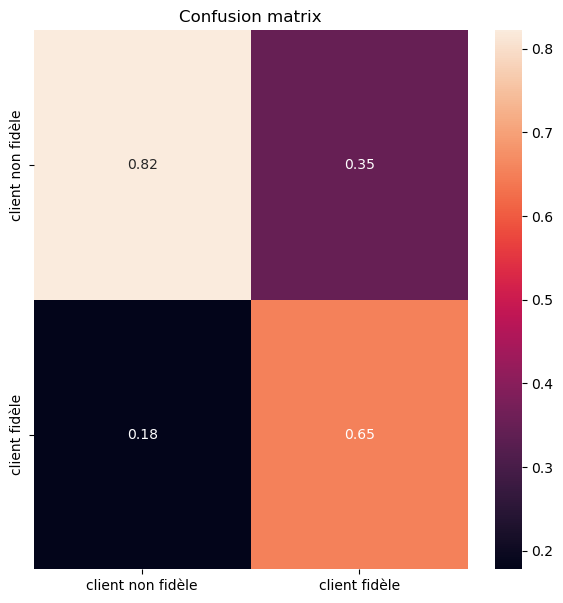

In [127]:
plt.figure(figsize=(7,7))
sns.heatmap(cm_df,annot=True)
plt.title("Confusion matrix")

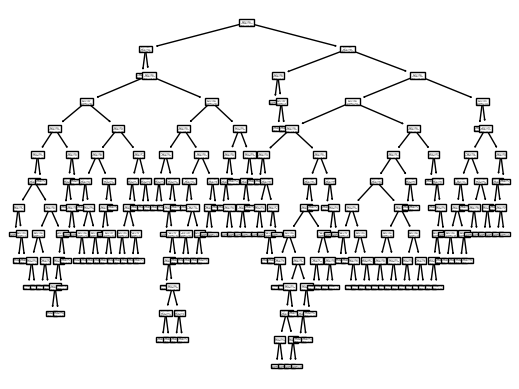

In [122]:
tree.plot_tree(modele);
# cest pas si mal maintenant peut etre essayer d'ameliorer le modele => cherche optimisation arbre de décision sur gogole